<a name="top"></a>
<div style="width:1000 px">

<div style="float:right; width:98 px; height:98px;">
<img src="https://cdn.miami.edu/_assets-common/images/system/um-logo-gray-bg.png" alt="Miami Logo" style="height: 98px;">
</div>

<h1>ATM 303 LabJack sampling and plotting lesson</h1>

<div style="clear:both"></div>
</div>

<hr style="height:2px;">

### Steps
1. <a href="#sampling">Sample from the LabJack device</a>
1. <a href="#plotting">Plot data</a>

<a name="sampling"></a>
### Read a single value

In [1]:
import u12
#d = u12.U12(debug=True)
d = u12.U12(debug=False)
help(u12.U12.eAnalogIn)

Help on function eAnalogIn in module u12:

eAnalogIn(self, channel, idNum=None, demo=0, gain=0)
    Name: U12.eAnalogIn(channel, idNum = None, demo=0, gain=0)
    Args: See section 4.1 of the User's Guide
    Desc: This is a simplified version of AISample. Reads the voltage from 1 analog input
    
    >>> import u12
    >>> d = u12.U12()
    >>> d.eAnalogIn(0)
    {'overVoltage': 0, 'idnum': 1, 'voltage': 1.435546875}



In [2]:
#overVoltage, idnum, voltage = d.eAnalogIn(0)
d.eAnalogIn(0)['voltage']


3.0078125

## Loop to capture a time series 

In [12]:
duration = 10     # SECONDS
dtime    = 1      # SECONDS

from time import gmtime, strftime
import time

t_end = time.time() + duration

data = {strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()):d.eAnalogIn(0)['voltage']}
while time.time() < t_end:
    print( int(t_end - time.time()) ) # Countdown timer
#Sleep:
    time.sleep(dtime) 
# Capture:
    data.update( {strftime("%a, %d %b %Y %H:%M:%S +0000", gmtime()):d.eAnalogIn(0)['voltage']} )

# Print the resulting dictionary:
data

9
8
7
6
5
4
3
2
1
0


{'Sun, 11 Feb 2018 01:06:59 +0000': 3.02734375,
 'Sun, 11 Feb 2018 01:07:00 +0000': 3.02734375,
 'Sun, 11 Feb 2018 01:07:01 +0000': 3.02734375,
 'Sun, 11 Feb 2018 01:07:02 +0000': 3.02734375,
 'Sun, 11 Feb 2018 01:07:03 +0000': 3.02734375,
 'Sun, 11 Feb 2018 01:07:04 +0000': 3.037109375,
 'Sun, 11 Feb 2018 01:07:05 +0000': 3.0419921875,
 'Sun, 11 Feb 2018 01:07:06 +0000': 3.0419921875,
 'Sun, 11 Feb 2018 01:07:07 +0000': 3.046875,
 'Sun, 11 Feb 2018 01:07:08 +0000': 3.046875,
 'Sun, 11 Feb 2018 01:07:09 +0000': 3.0517578125}

<a name="plotting"></a>
# Plotting code 

Populating the interactive namespace from numpy and matplotlib


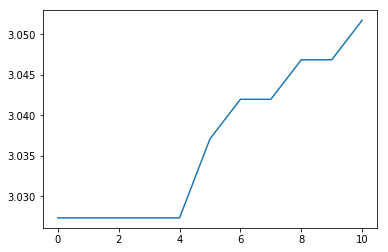

In [13]:
%pylab inline
plot(data.values())

<a href="#top">Top</a>
<hr style="height:2px;">